#### Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Load the data

In [4]:
# Load dataset
file_path = "C:\\Users\\SUHEL\\Downloads\\Housing.csv"
data = pd.read_csv(file_path)
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

#### Exploratory Data Analysis(EDA)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545

C:\Users\SUHEL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


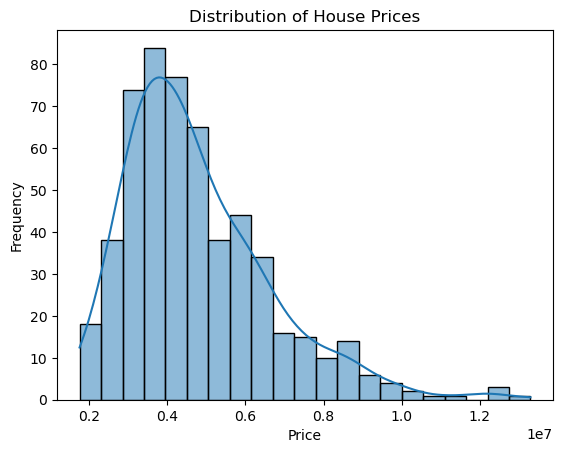

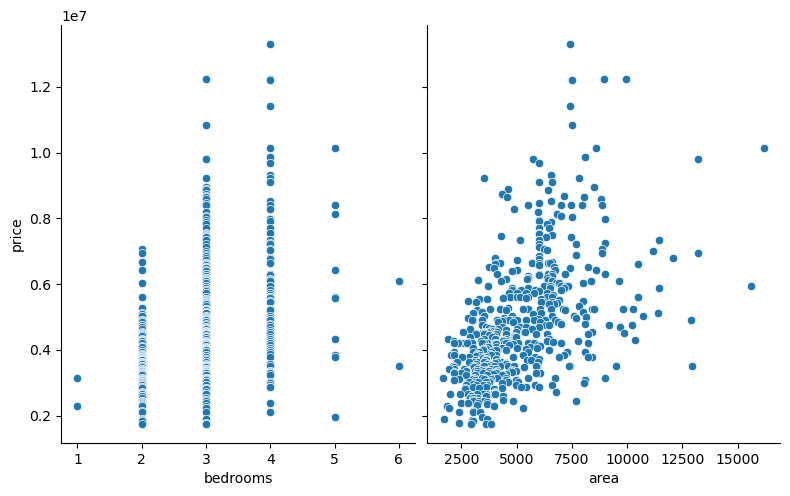

In [6]:
# Display the first few rows of the dataset
print(data.head())

# Get a summary of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Plotting the distribution of house prices
sns.histplot(data['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plotting relationships between features and the target
sns.pairplot(data, x_vars=['bedrooms', 'area'], y_vars='price', height=5, aspect=0.8)
plt.show()


#### Data Preprocessing

In [7]:
# Handle missing values (if any)
data = data.dropna()

# Select features and target variable
X = data[['bedrooms', 'area']]
y = data['price']


#### Split the Data into Training and Testing Sets


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Build the regression model

In [9]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

#### Evaluate the model

Mean Squared Error: 3280176595474.013
R-squared: 0.3510473817558726


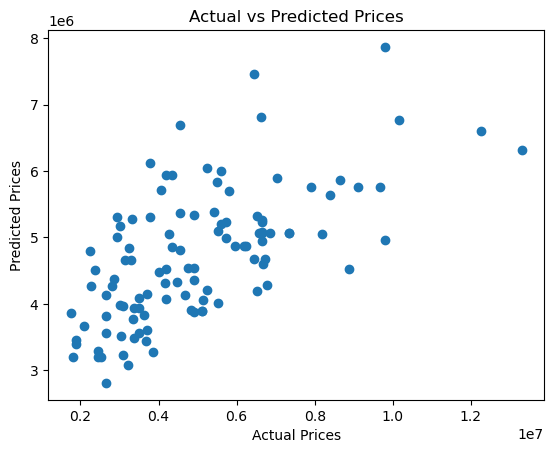

In [10]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting the actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


#### Make a Prediction

In [11]:
# Example prediction
new_house = [[3, 2000]]  # 3 bedrooms, 2000 sqft
predicted_price = model.predict(new_house)
print(f'Predicted Price for a house with 3 bedrooms and 2000 sqft: {predicted_price[0]}')

Predicted Price for a house with 3 bedrooms and 2000 sqft: 3507573.870069295


C:\Users\SUHEL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
